In [1]:
%load_ext autoreload
%autoreload 2
from sage.all import *
from utility import *

Pi = sage.symbolic.constants.pi

In [41]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

a1,a2,a3,a4 = var('a1,a2,a3,a4', domain=CC) # ai in C
s1 = a1*a4 + a2*a3
s2 = a2*a4 + a3*a1
s3 = a3*a4 + a1*a2
s4 = a1*a2*a3*a4 + a1^2 + a2^2 + a3^2 + a4^2 - 4

X = x*y*z + x^2 + y^2 + z^2 -s1*x -s2*y -s3*z + s4
X = X.subs(a1==1, a2==1, a3==1, a4==-1) # Choosing a to have at most one nonzero entry, this becomes T_2_2_2.
print(f'X is defined by {X} == 0.')

X is defined by x*y*z + x^2 + y^2 + z^2 - 1 == 0.


In [50]:
# Check if X is smooth
X_vars = [x,y,z]
constraints = [X.diff(var) == 0 for var in X_vars]
solutions = solve(constraints, X_vars, solution_dict=True)
singularities = [point for point in solutions if X.subs(point).is_zero()]

if singularities:
    print(f"The variety is singular at the following points: {singularities}")
else:
    print("The variety is smooth.")

The variety is smooth.


# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is 1/5*(5*t - 10*y - 6*z)*y*z + 1/25*(5*t - 10*y - 6*z)^2 + y^2 + z^2 - 1 == 0
The model fibre over 2.50000000000000 + 1.00000000000000*I is -1/5*(10*y + 6*z - 12.5000000000000 - 5.00000000000000*I)*y*z + 1/25*(10*y + 6*z - 12.5000000000000 - 5.00000000000000*I)^2 + y^2 + z^2 - 1 == 0
Critical values: 9 
Critical points: 9


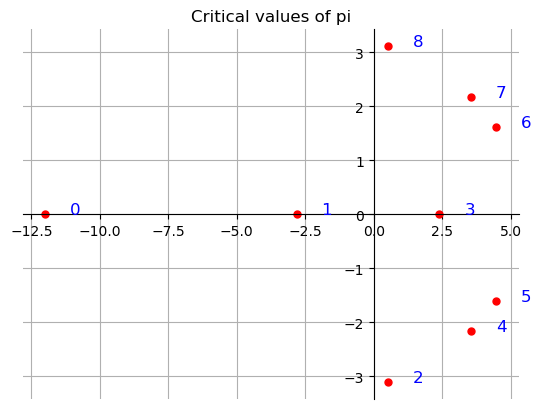

In [47]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: 1,
    beta: 2,
    gamma: 1.2
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = I+2.5
solvefor=x

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre.simplify()==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.simplify().subs({t:origin_fibre})==0}')

crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)
crit_points_pi = pi.get_critical_points()

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

### Criticality at Infinity

In [48]:
print(intersection_summary(pi))
intersection = intersection_at_infinity(pi)

for point in intersection:
    print(kernels(pi, point))
    print(point)

fibre_boundary = pi.get_fibre_boundary_components(origin_fibre, solvefor)
print(f'The fibration has {len(fibre_boundary)} boundary components, coming from the following intersections at infinity in projective space:')
print(fibre_boundary)

The hyperplane at infinity is given by 1.00000000000000*x*y*z == 0.
The fibration vanishes at [1.00000000000000*x + 2.00000000000000*y + 1.20000000000000*z == 0].
Their intersection consists of [{x: 0, y: 1, z: -5/3, w: 0}, {x: 1, y: 0, z: -5/6, w: 0}, {x: 1, y: -1/2, z: 0, w: 0}].
None
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[                0  1.00000000000000 -1.66666666666667                 0]
{x: 0, y: 1, z: -5/3, w: 0}
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[  1.00000000000000                  0 -0.833333333333333                  0]
{x: 1, y: 0, z: -5/6, w: 0}
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[  1.00000000000000 -0.500000000000000                  0                  0]
{x: 1, y: -1/2, z: 0, w: 0}
The fibration has 3 boundary components, coming from the following intersections at infinity in projective space:
[{y: 1, z: -5/3, w: 0}, {y: 0, z: 1, w: 0}, {y: 1, z: 0, w: 0}

## The fibration $\rho$

The expression of rho over t in C is 2*y + 1.90000000000000*z
Critical values: 6
Critical points: 6


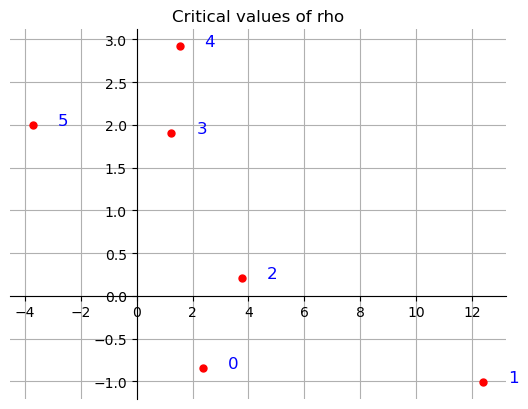

In [51]:
ar = var('ar', domain=CC)
br = var('br', domain=CC)

rho = ar*y + br*z

# rho = rho.subs({ar: 3*e^(2*Pi*I*-0.05).n(), br: 8*e^(2*I*Pi*0.08).n()})

rho = rho.subs({ar: 2, br: 1.9})
origin_fibre_rho = 0

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)

rho = LefschetzFibration([y,z], t_fibre.subs(t==origin_fibre), rho_0)

crit_points_rho = rho.get_critical_points()
crit_values_rho = sort_by_angle(rho.get_critical_values())

# Somehow crit values is bugging out

# a = var('a', domain=CC)
# constraints = [rho.domain==0]
# gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
# a_solved = solve(gradient_constraints[0], a)[0]
# b = gradient_constraints[0]
# gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
# constraints.extend(gradient_constraints)
# print(constraints)

# crit_points_rho = solve(constraints, rho.variables)
# crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
# crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

# print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre_rho, title="Critical values of rho")


### Vanishing Cycles of Rho

#### Origin Fibre

4/361*(70*y - 237.5000000000001 - 95.00000000000001*I)*y^2 + 1/9025*(70*y - 237.5000000000001 - 95.00000000000001*I)^2 + 761/361*y^2 - 1
[-2.67059531-0.11263789j  1.13107881+1.72321612j  1.5145165 -0.25343537j]


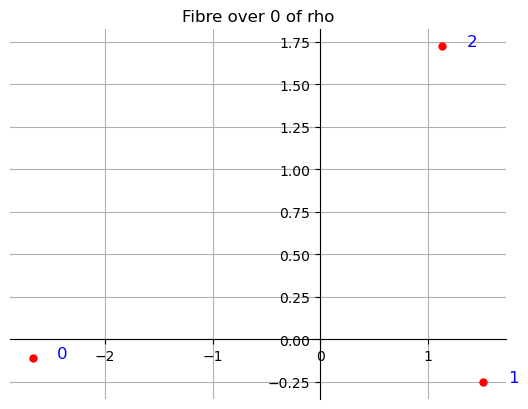

In [52]:
solvefor_rho = z

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)
print(sols)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


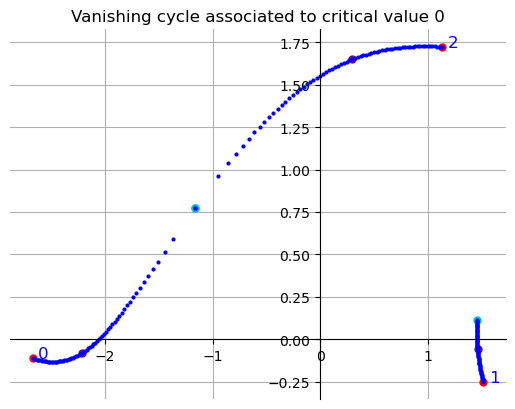

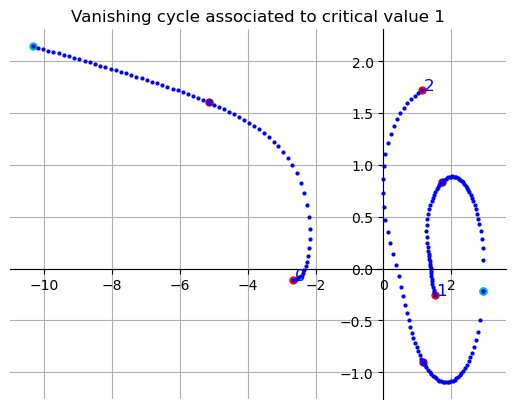

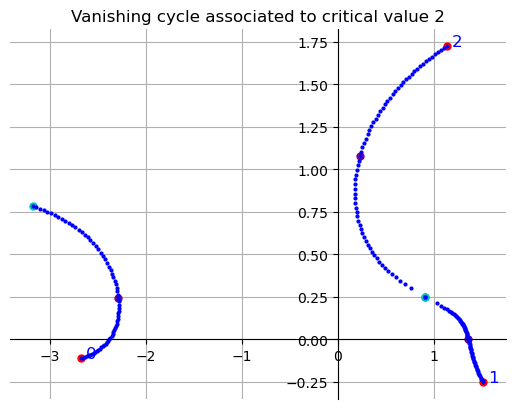

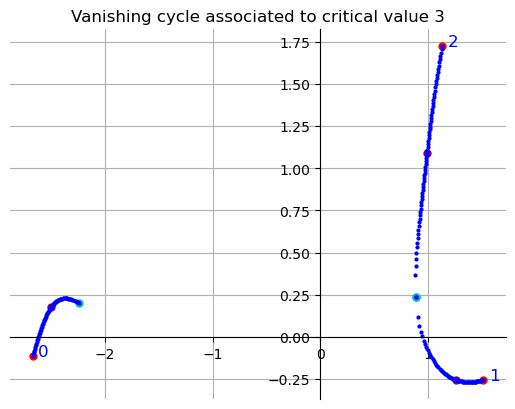

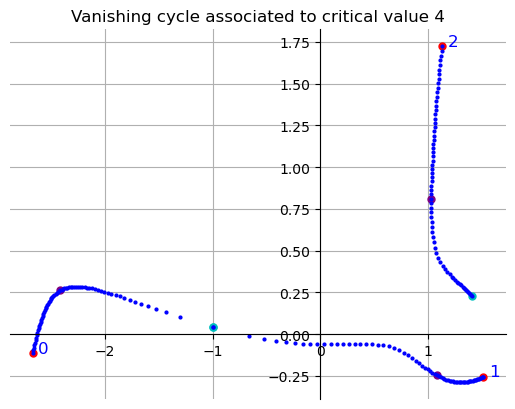

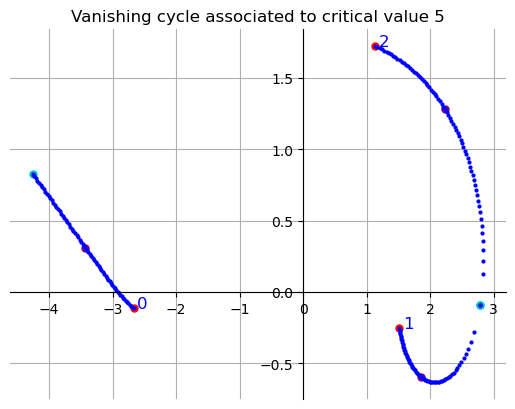

In [53]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

## Matching Paths - Images of Vanishing Cycles

In [56]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object